In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from algos import SHCLVND, ES, SHCLVND_perm, HC, HC_dyn, HC_Alsing, HC_Alsing_mod
from algos.cost import draw_individual_array, draw_individual_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Evo stuff

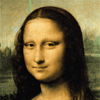

In [4]:
ref = Image.fromarray(np.array(Image.open('img/monalisa.png'))[:,:,:3])
ref

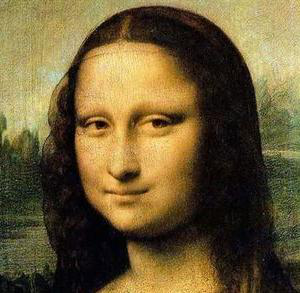

In [12]:
ref = Image.open('img/monalisa_big.jpg')
ref

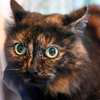

In [2]:
ref = Image.open('img/kot.jpg')
ref

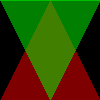

In [31]:
ref = Image.open('img/ref.png')
ref

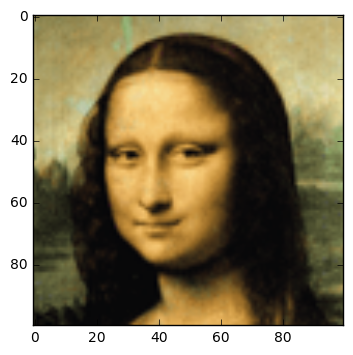

In [5]:
plt.imshow(ref)

## Alsing mod

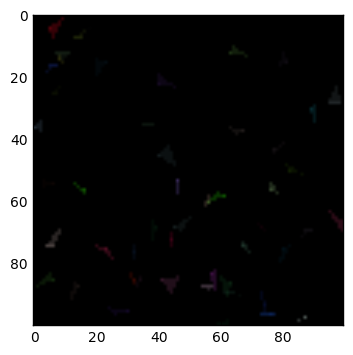

In [57]:
# puścić to jeszcze raz, był bug ze zmianą permutacji!
# chodzi o wersję ze wszystkimi wielokątami od razu

hcamod = HC_Alsing_mod(1, 1, ref, max_num_figs=50, max_num_edges=10, board='black')
plt.imshow(hcamod.best_img())

Score after 510000 iterations: -4980196
Score after 520000 iterations: -4965642
Score after 530000 iterations: -4959568
Score after 540000 iterations: -4949353
Score after 550000 iterations: -4942832
Score after 560000 iterations: -4934758
Score after 570000 iterations: -4920585
Score after 580000 iterations: -4910140
Score after 590000 iterations: -4900726
Score after 600000 iterations: -4888991
Score after 610000 iterations: -4880639
Score after 620000 iterations: -4869650
Score after 630000 iterations: -4849646
Score after 640000 iterations: -4841476
Score after 650000 iterations: -4820248
Score after 660000 iterations: -4807509
Score after 670000 iterations: -4792741
Score after 680000 iterations: -4786515
Score after 690000 iterations: -4784427
Score after 700000 iterations: -4771699
Score after 710000 iterations: -4766823
Score after 720000 iterations: -4764018
Score after 730000 iterations: -4755499
Score after 740000 iterations: -4750435
Score after 750000 iterations: -4747992


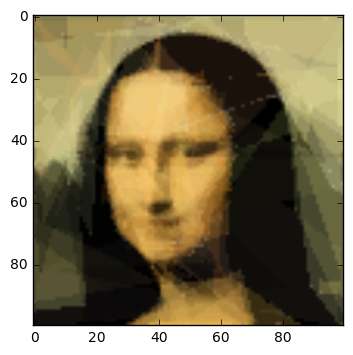

In [73]:
%%time
#35
hcamod.train(500000, 10000)

In [74]:
hcamod.save('res/mona_35m')

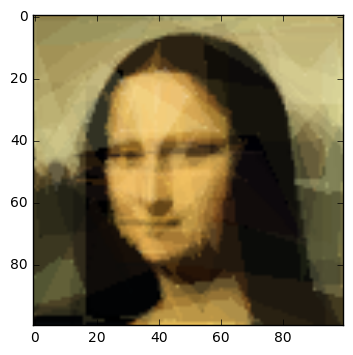

In [47]:
plt.imshow(Image.open('res/mona_35m_hcAls_1_1_50_10_1000000.png'))

In [61]:
len(hcamod.population[0][0])

10

## Alsing

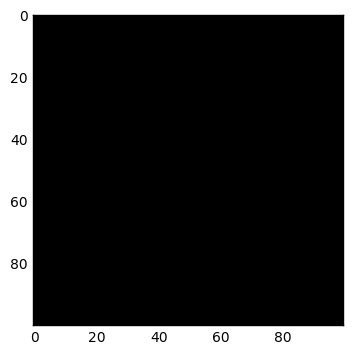

In [45]:
hca = HC_Alsing(1, 1, ref, max_num_figs=50, max_num_edges=10, board='black')
plt.imshow(hca.best_img())

Score after 10000 iterations: -5615
Score after 20000 iterations: -2555
Score after 30000 iterations: -1783
Score after 40000 iterations: -1538
Score after 50000 iterations: -1259
Score after 60000 iterations: -1126
Score after 70000 iterations: -1042
Score after 80000 iterations: -983
Score after 90000 iterations: -904
Score after 100000 iterations: -849
Score after 110000 iterations: -815
Score after 120000 iterations: -785
Score after 130000 iterations: -763
Score after 140000 iterations: -740
Score after 150000 iterations: -709
Score after 160000 iterations: -678
Score after 170000 iterations: -654
Score after 180000 iterations: -644
Score after 190000 iterations: -629
Score after 200000 iterations: -614
Score after 210000 iterations: -601
Score after 220000 iterations: -595
Score after 230000 iterations: -584
Score after 240000 iterations: -575
Score after 250000 iterations: -562
Score after 260000 iterations: -548
Score after 270000 iterations: -543
Score after 280000 iterations:

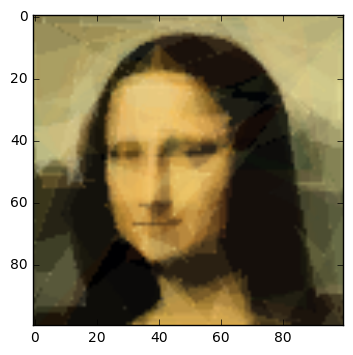

In [46]:
%%time
hca.train(1000000, 10000)

In [21]:
# 100x100, mona35m 1M: 443 per pixel (mean)



# 293x300, mona45m 600K: 814

43950000

In [24]:
len(hca.best_ind[0])

40

In [47]:
hca.save('res/mona_38m')

## HC dyn

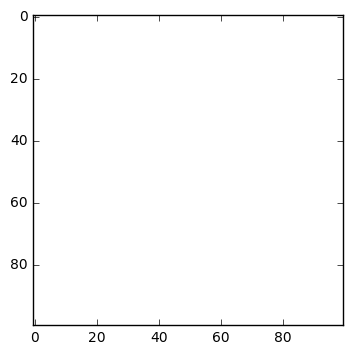

In [55]:
hcd = HC_dyn(1, 1, ref, max_num_figs=50, max_num_edges=10, mut_add_pol=.01, mut_add_point=.005)
plt.imshow(hcd.best_img())

Score after 210000 iterations: -19388928
Score after 220000 iterations: -18595223
Score after 230000 iterations: -18177961
Score after 240000 iterations: -18105437
Score after 250000 iterations: -17999568
Score after 260000 iterations: -17966096
Score after 270000 iterations: -17935518
Score after 280000 iterations: -17840801
Score after 290000 iterations: -17751682
Score after 300000 iterations: -17740740
CPU times: user 42.5 s, sys: 128 ms, total: 42.6 s
Wall time: 42.6 s


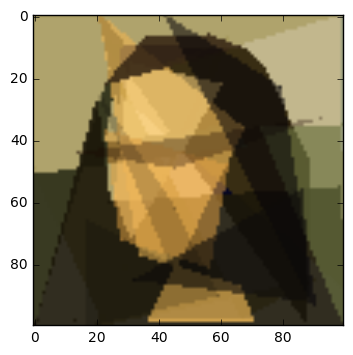

In [67]:
%%time
hcd.train(100000, 10000)

In [68]:
len(hcd.best_ind[0])

14

In [147]:
hcd.save('kot_5m')

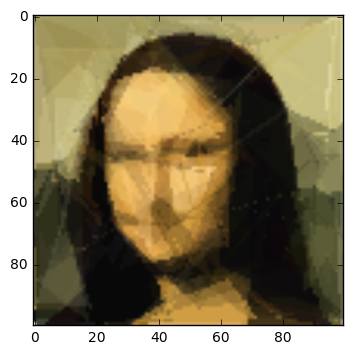

In [30]:
plt.imshow(hcd.best_imgs[-20])

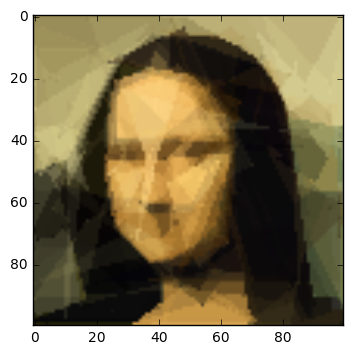

In [207]:
plt.imshow(hcd.best_imgs[-50])

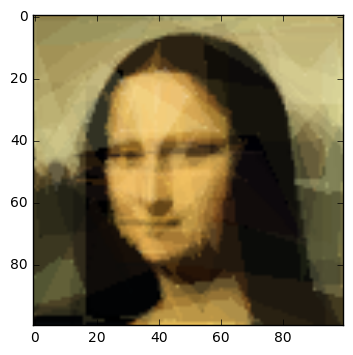

In [29]:
plt.imshow(Image.open('res/mona_35m_hcAls_1_1_50_10_1000000.png'))

## Hill Climbing

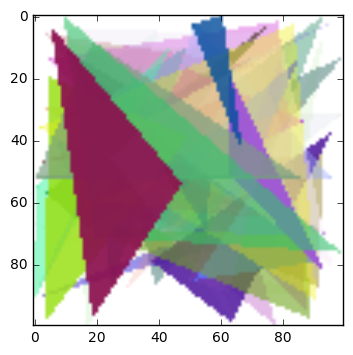

In [14]:
hc = HC(1, 10, ref, num_figs=50, num_edges=3)
plt.imshow(hc.best_img())

Score after 1000 iterations: -896050704
Score after 2000 iterations: -672004012
Score after 3000 iterations: -579925558
Score after 4000 iterations: -525626973
Score after 5000 iterations: -448511678
Score after 6000 iterations: -404466097
Score after 7000 iterations: -384627329
Score after 8000 iterations: -346036179
Score after 9000 iterations: -323738585
Score after 10000 iterations: -298399572
Score after 11000 iterations: -281569867
Score after 12000 iterations: -266236423
Score after 13000 iterations: -262003006
Score after 14000 iterations: -257348428
Score after 15000 iterations: -253144451
Score after 16000 iterations: -247958705
Score after 17000 iterations: -229097160
Score after 18000 iterations: -226308384
Score after 19000 iterations: -223581783
Score after 20000 iterations: -213911369
Score after 21000 iterations: -211747690
Score after 22000 iterations: -207958373
Score after 23000 iterations: -204868871
Score after 24000 iterations: -203834337
Score after 25000 iterati

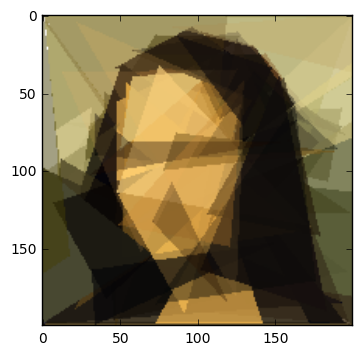

In [10]:
%%time
hc.train(250000, 1000)

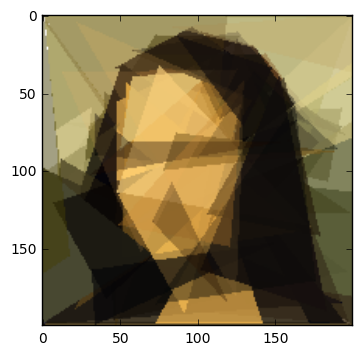

In [13]:
plt.imshow(hc.best_imgs[-1])

In [20]:
hc.save('mona_13m')

AttributeError: PseudoCGA instance has no attribute 'save'

## ES

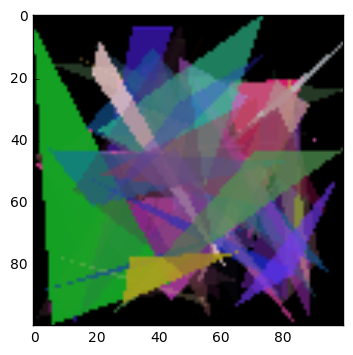

In [548]:
es = ES(1, 1, 1, 5, ref, num_figs=50, num_edges=3, cx=None, roulette=False)
plt.imshow(es.best_img())

Scores after 6100 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6200 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6300 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6400 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6500 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6600 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6700 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6800 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6900 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 7000 iterations: [-261794979, -261794979, -261794979, -261794979]
CPU times: user 1.07 s, sys: 44.1 ms, total: 1.11 s
Wall time: 1.05 s


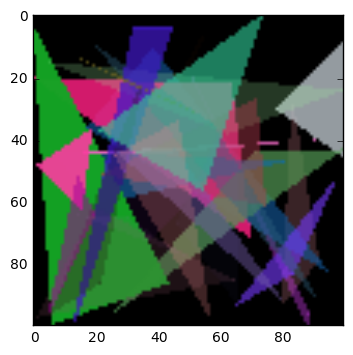

In [555]:
%%time
es.train(1000, 100)

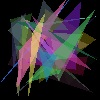

In [547]:
es.best_imgs[-1]

In [543]:
es.log_sigmas[-1]

array([  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   9.23692330e-01,
         7.12863153e-01,   3.93115517e-01,   9.44836598e-01,
         3.70705045e-01,   4.32388889e-01,   4.39947104e-01,
         9.79127578e-01,   8.04009862e-01,   8.62964135e-01,
         2.38163794e-01,   4.49524142e-01,   5.64872889e-01,
         3.21716805e-01,   8.83920914e-01,   9.68770535e-01,
         6.07989038e-01,   3.47281420e-01,   4.92253665e-01,
         7.00472325e-01,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,

In [193]:
es.scores

array([-79409500, -76702522, -77360842, -77655618, -76255030, -76653277,
       -76725342, -76240915, -76278918, -76839849, -76660501, -76041781,
       -77355076, -77657577, -76911664, -76286306, -77393889, -76017507,
       -75964618, -77173659, -75161207, -74411669, -77455583, -72406746,
       -77660181, -75612281, -74377471, -75711650, -76566151, -68734110,
       -76310490, -70614116, -75763299, -77505001, -76144316, -76176818,
       -73169139, -77622742, -77041651, -76937777, -77403788, -77652357,
       -77668810, -78101673, -72389796, -77743472, -75727278, -77965271,
       -75773891, -78055693, -77873837, -75272023, -70854298, -77911662,
       -78141484, -75737101, -78322851, -71766383, -78212479, -78390770,
       -78481851, -78785253, -78704989, -78476365, -73266312, -78611252,
       -75565625, -78735428, -78552512, -71035864, -72921063, -78790892,
       -78806528, -71853222, -75097056, -71640117, -79031902, -74628396,
       -74279219, -78970198, -74976582, -78878763, 

# SHCLVND

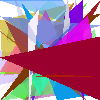

In [22]:
shclvnd = SHCLVND_perm(50, .1, .2, .999, ref, num_figs=50, num_edges=3, mode='polygon_simple')
shclvnd.best_img()

Score after 4100 iterations: -1011
Score after 4200 iterations: -1011
Score after 4300 iterations: -997
Score after 4400 iterations: -997
Score after 4500 iterations: -997
Score after 4600 iterations: -997
Score after 4700 iterations: -997
Score after 4800 iterations: -997
Score after 4900 iterations: -991
Score after 5000 iterations: -991
CPU times: user 58.7 s, sys: 83.9 ms, total: 58.8 s
Wall time: 58.9 s


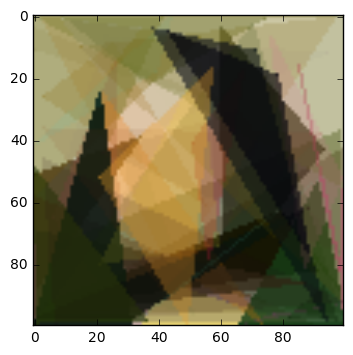

In [27]:
%%time
shclvnd.train(1000, 100)
# print (shclvnd.mus * 100).astype(int).reshape(2,-1)

In [14]:
shclvnd.save('res/mona_7m')

In [43]:
shclvnd.sigmas[0]

0.0013442223919731197

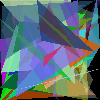

In [297]:
shclvnd_perm = SHCLVND_perm(50, .1, .2, .999, ref, num_figs=50, num_edges=3, mode='polygon_simple')
shclvnd_perm.best_img()

Score after 2100 iterations: -37386001
Score after 2200 iterations: -36371361
Score after 2300 iterations: -35746362
Score after 2400 iterations: -34319851
Score after 2500 iterations: -33928089
Score after 2600 iterations: -33356591
Score after 2700 iterations: -32368304
Score after 2800 iterations: -32368304
Score after 2900 iterations: -32368304
Score after 3000 iterations: -31777968
Score after 3100 iterations: -31511225
Score after 3200 iterations: -31396656
Score after 3300 iterations: -31239800
Score after 3400 iterations: -31009807
Score after 3500 iterations: -30948892
Score after 3600 iterations: -30694350
Score after 3700 iterations: -30467984
Score after 3800 iterations: -30423915
Score after 3900 iterations: -30423915
Score after 4000 iterations: -29812776
Score after 4100 iterations: -29812776
Score after 4200 iterations: -29812776
Score after 4300 iterations: -29812776
Score after 4400 iterations: -29460920
Score after 4500 iterations: -29343257
Score after 4600 iteratio

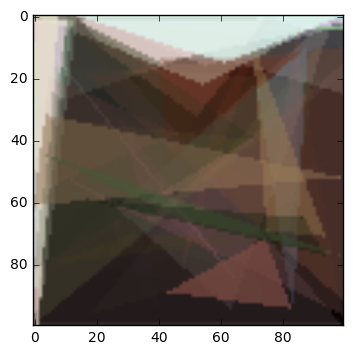

In [300]:
%%time
shclvnd_perm.train(10000, 100)
# print (shclvnd_perm.mus * 100).astype(int).reshape(2,-1)

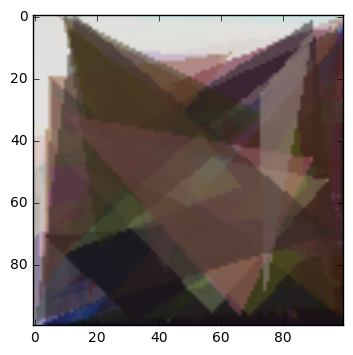

In [126]:
plt.imshow(shclvnd.best_img())

## Experiments

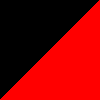

In [12]:
img = Image.new('RGB', (100,100), 'black')
drw = ImageDraw.Draw(img, 'RGBA')
drw.polygon([(99,0), (99,99), (0,99)], (255,0,0,255))
img

In [19]:
from algos.cx import cx_one_point, cx_random

## Timers

In [170]:
test_pop = np.random.rand(POP_SIZE, NUM_POLS * POL_LEN).reshape(POP_SIZE / 2, 2, NUM_POLS * POL_LEN)

In [188]:
%%timeit
cx_random(test_pop)

1000 loops, best of 3: 188 µs per loop


In [189]:
%%timeit
cx_one_point(test_pop)

The slowest run took 6.51 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 152 µs per loop


In [206]:
test_ind = np.random.rand(NUM_POLS, POL_LEN)

In [227]:
%%timeit
img = draw_individual(test_ind, (100, 100))

1000 loops, best of 3: 957 µs per loop


In [10]:
%%timeit
dist(img, img)

1000 loops, best of 3: 262 µs per loop
